## Análise Exploratória dos Dados

In [93]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [94]:
df = pd.read_excel(r'C:\Users\fabio\Desktop\Data Science\Projetos\Credit Score\dados_credito.xlsx')
df.head(10)

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
5,6,SP,30,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667
6,7,MG,32,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,6800,0,0,45.166667
7,8,SC,35,Superior Completo,Solteiro,1,Sim,2,450000,Sim,2400,25,Sim,22000,1,150000,50.666667
8,9,PR,42,Segundo Grau Completo,Casado,0,Não,0,0,Não,0,48,Sim,4500,2,28000,56.166667
9,10,RJ,45,Superior Cursando,Casado,0,Não,0,0,Não,0,120,Não,9800,0,0,61.666667


In [95]:
df.tail(10)

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10466,10467,RJ,48,Superior Completo,Casado,2,Não,3,700000,Não,0,75,Não,17500,1,50000,83.666667
10467,10468,PR,51,Segundo Grau Completo,Casado,3,Sim,1,340000,Sim,4000,90,Sim,13000,2,180000,89.166667
10468,10469,SP,48,Superior Cursando,Casado,3,Sim,1,450000,Sim,3200,93,Não,5300,0,0,94.666667
10469,10470,RJ,51,Superior Completo,Viuvo,1,Não,3,900000,Não,0,150,Não,18300,1,80000,98.000000
10470,10471,RJ,48,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
10471,10472,PR,51,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
10472,10473,SP,48,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [96]:
df.shape

(10476, 17)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

In [98]:
df.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [99]:
df.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

In [100]:
df.loc[df['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


In [101]:
df.replace('SEM DADOS', np.nan, inplace=True)

In [102]:
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].astype(np.float64)

In [103]:
df.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [104]:
df['ULTIMO_SALARIO'] = df['ULTIMO_SALARIO'].fillna((df['ULTIMO_SALARIO'].median()))

In [105]:
df.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [107]:
df.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


In [108]:
variaveis_numericas = []
for i in df.columns[0:16].tolist():
    if df.dtypes[i] == 'int64' or df.dtypes[i] == 'float64':
        print(i, ':', df.dtypes[i])
        variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


In [109]:
variaveis_numericas

['IDADE',
 'QT_FILHOS',
 'QT_IMOVEIS',
 'VL_IMOVEIS',
 'OUTRA_RENDA_VALOR',
 'TEMPO_ULTIMO_EMPREGO_MESES',
 'ULTIMO_SALARIO',
 'QT_CARROS',
 'VALOR_TABELA_CARROS',
 'SCORE']

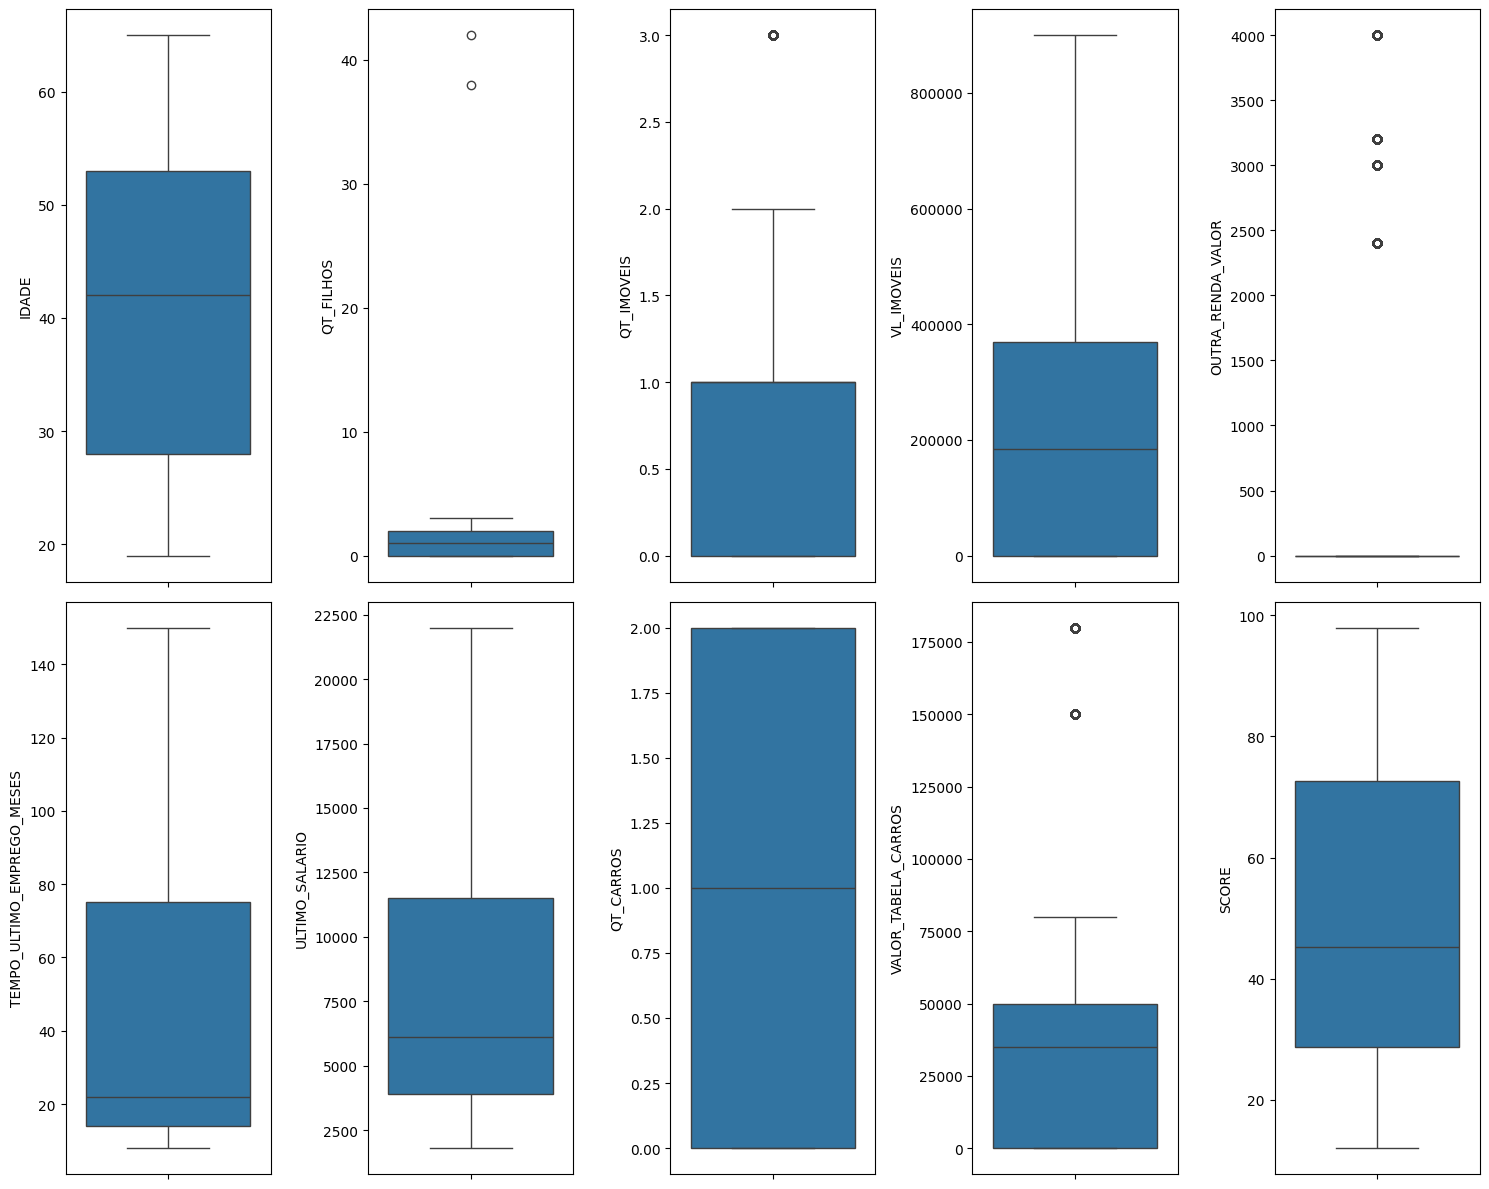

In [110]:
plt.rcParams['figure.figsize'] = [15.0, 12.00]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots(2,5)

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data= df, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 5:
        linha += 1
        coluna = 0

plt.show()

In [111]:
df.loc[df['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


In [112]:
df.drop(df.loc[df['QT_FILHOS'] > 4].index, inplace=True)

In [113]:
df.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       8350
2400     468
3000     612
3200     522
4000     522
dtype: int64

In [114]:
df.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         3762
28000      468
30000      791
35000      792
40000      792
48000      522
50000     1314
70000      521
80000      522
150000     468
180000     522
dtype: int64

In [115]:
df.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    4680
1    3761
2     989
3    1044
dtype: int64

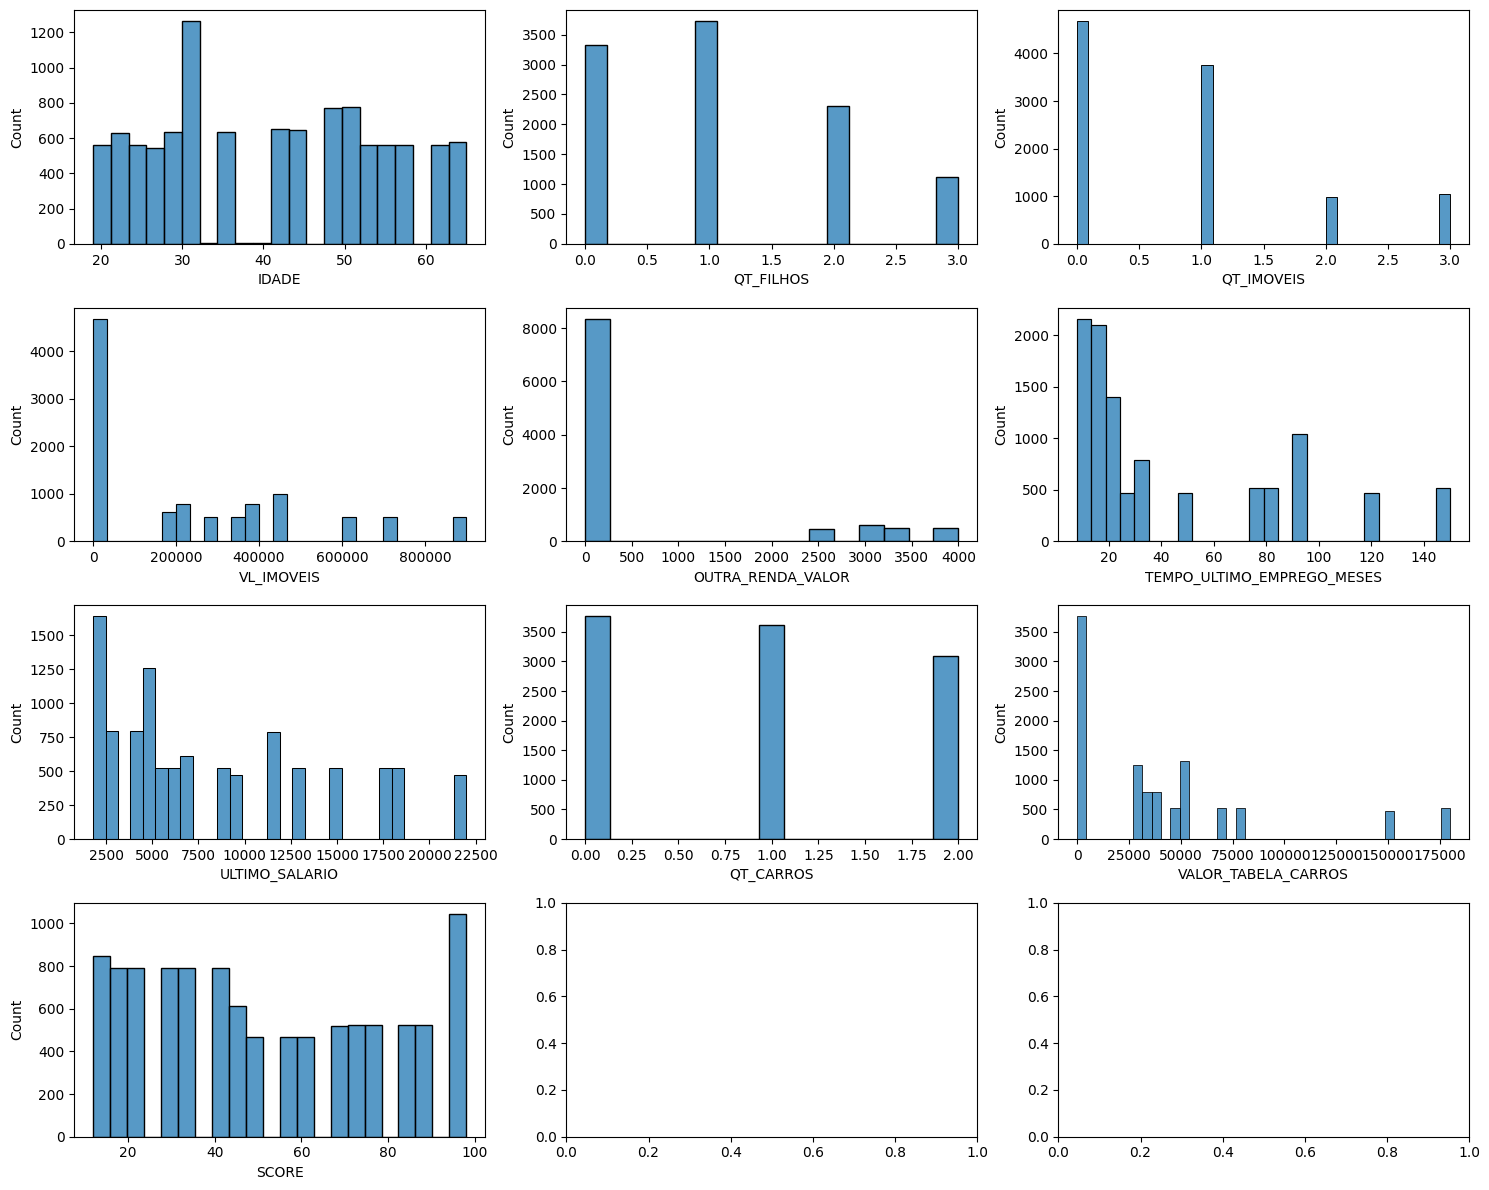

In [116]:
plt.rcParams['figure.figsize'] = [15.00, 12.00]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots(4,3)

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = df, x=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 3:
        linha += 1
        coluna = 0

plt.show()


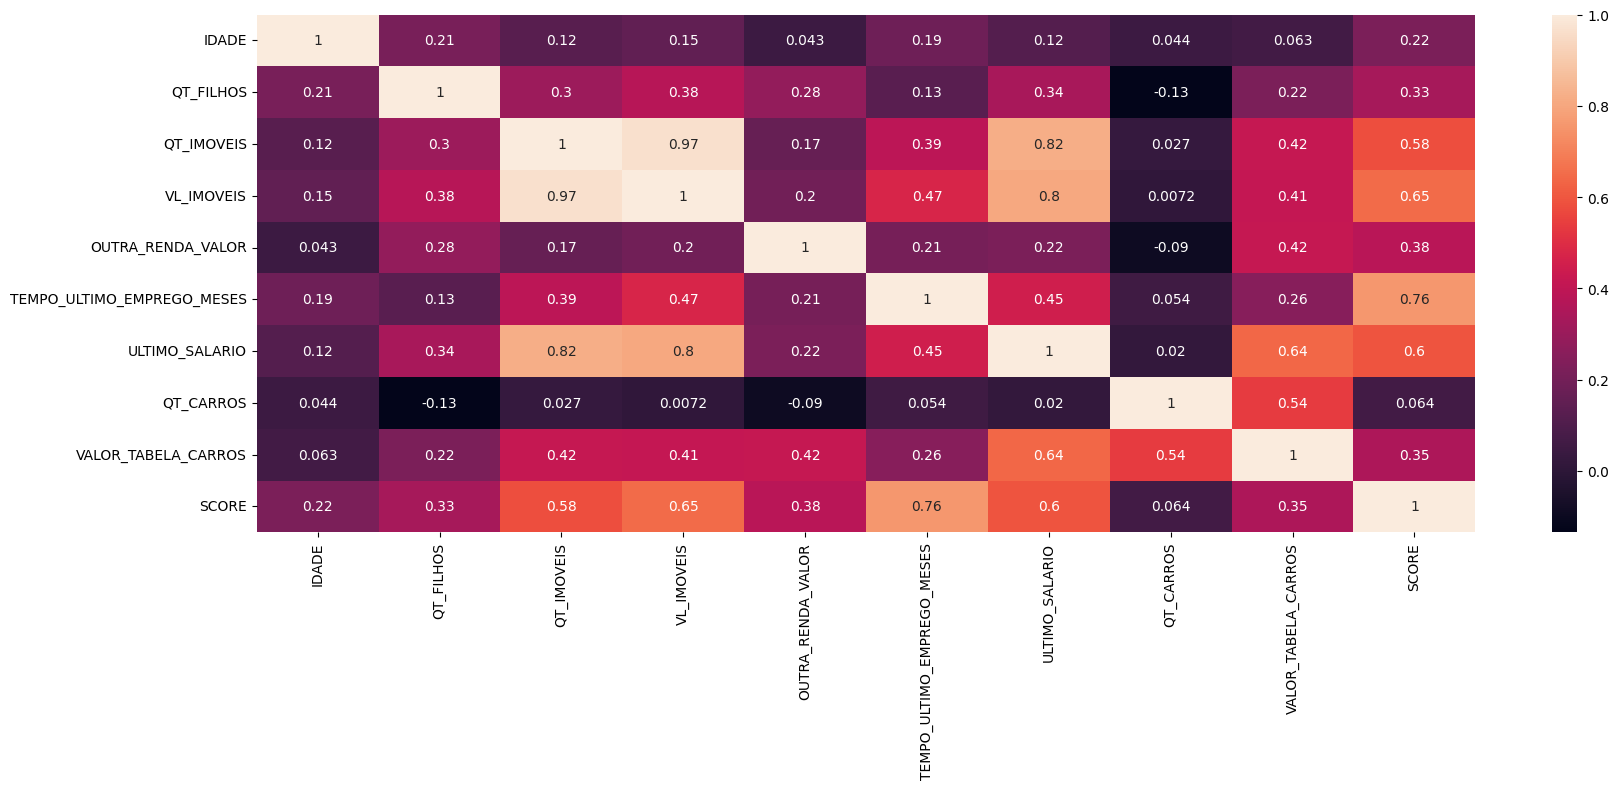

In [117]:
plt.rcParams['figure.figsize'] = (18,8)
ax = sns.heatmap(df.corr(), annot=True)

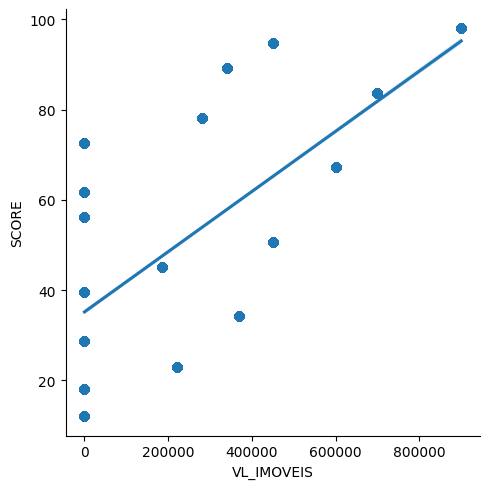

In [118]:
sns.lmplot(x = 'VL_IMOVEIS', y = 'SCORE', data = df)

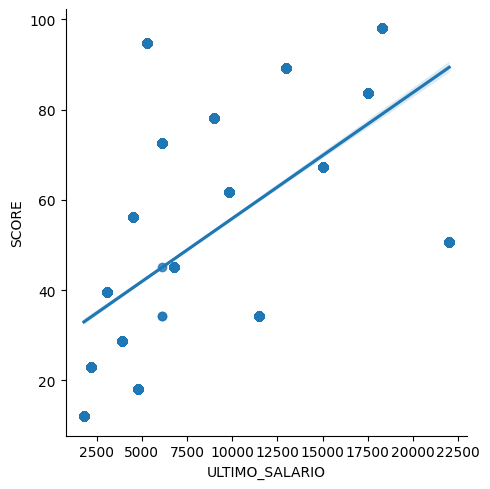

In [119]:
sns.lmplot(x = 'ULTIMO_SALARIO', y = 'SCORE', data = df)

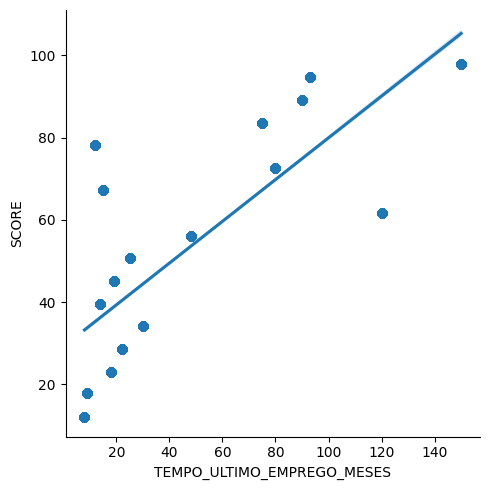

In [120]:
sns.lmplot(x = 'TEMPO_ULTIMO_EMPREGO_MESES', y = 'SCORE', data = df)

In [121]:
print('Menor Idade: ', df['IDADE'].min())
print('Maior Idade: ', df['IDADE'].max())

Menor Idade:  19
Maior Idade:  65


In [122]:
idade_bins = [0, 30, 40, 50, 60]
idade_categoria = ['até 30', '31 a 40', '41 a 50', 'Maior que 50']

df['FAIXA_ETARIA'] = pd.cut(df['IDADE'], idade_bins, labels= idade_categoria)

df['FAIXA_ETARIA'].value_counts()

até 30          3552
Maior que 50    2448
41 a 50         2070
31 a 40         1270
Name: FAIXA_ETARIA, dtype: int64

In [123]:
df.groupby(['FAIXA_ETARIA']).mean()['SCORE']

FAIXA_ETARIA
até 30          44.762950
31 a 40         48.883202
41 a 50         51.440177
Maior que 50    56.123775
Name: SCORE, dtype: float64

In [124]:
variaveis_categoricas = []
for i in df.columns[0:20].tolist():
    if df.dtypes[i] == 'object' or df.dtypes[i] == 'category':
        print(i, ';' , df.dtypes[i])
        variaveis_categoricas.append(i)

UF ; object
ESCOLARIDADE ; object
ESTADO_CIVIL ; object
CASA_PROPRIA ; object
OUTRA_RENDA ; object
TRABALHANDO_ATUALMENTE ; object
FAIXA_ETARIA ; category


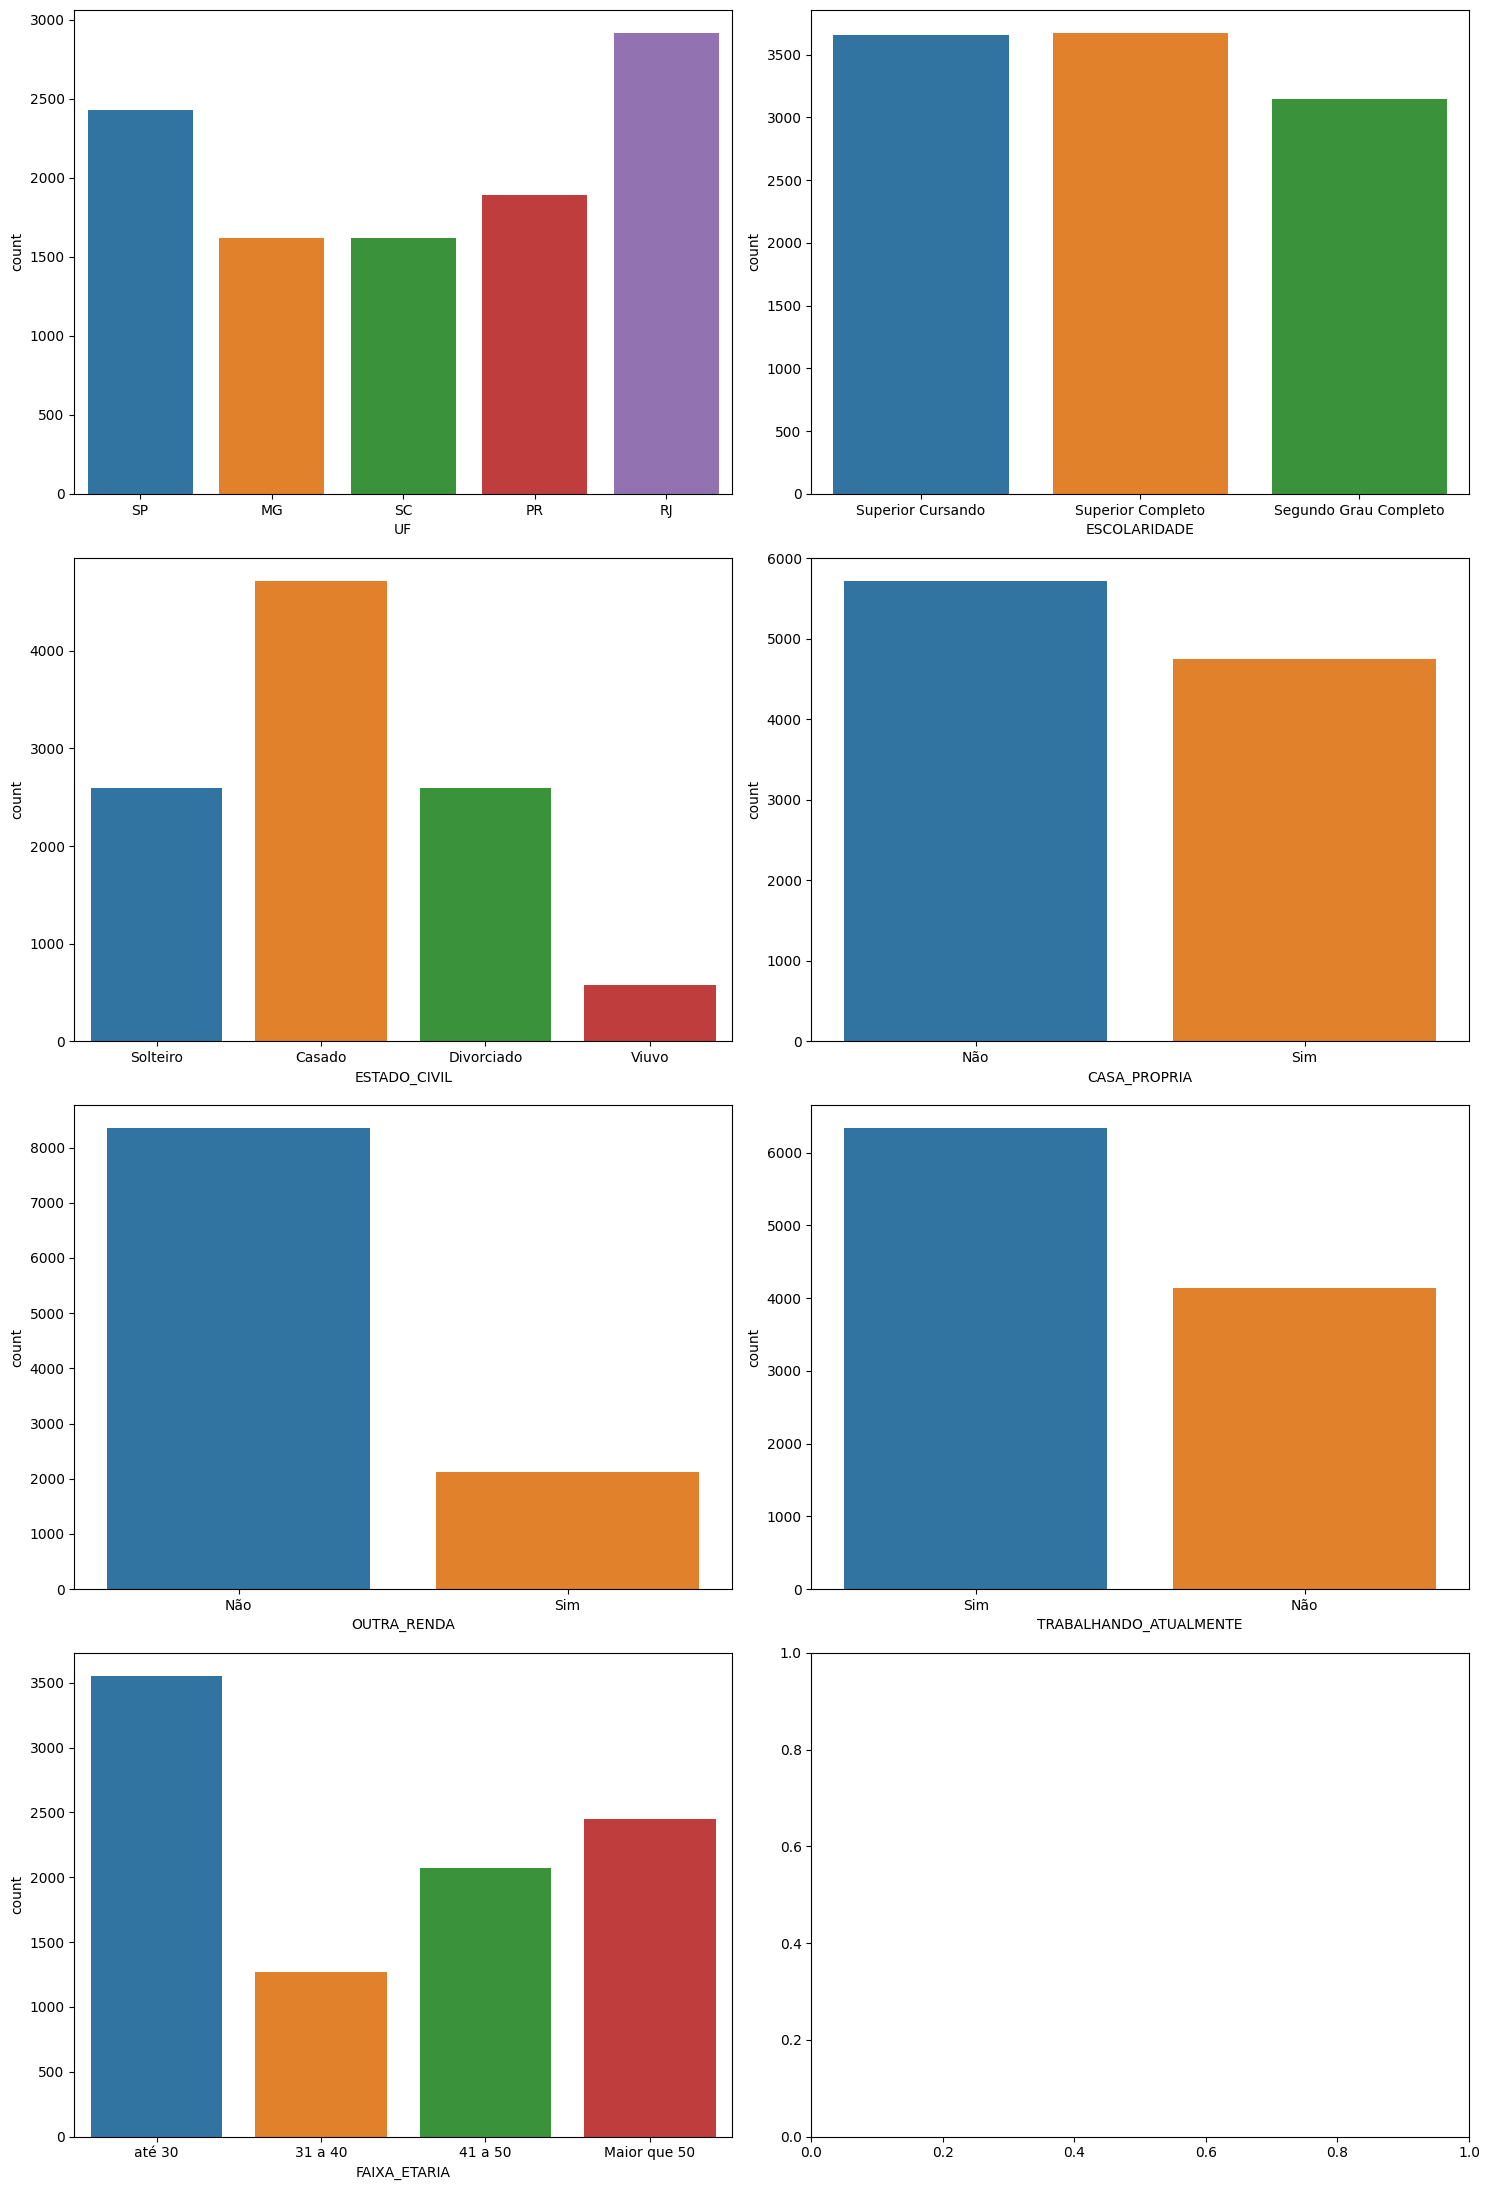

In [125]:
plt.rcParams['figure.figsize'] = [15.00, 22.00]
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(4, 2)

linha = 0
coluna = 0

for i in variaveis_categoricas:
    sns.countplot(data= df, x=i, ax=axes[linha][coluna], palette='tab10')

    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

## Pré Processamento dos Dados

In [126]:
lb = LabelEncoder()

df['FAIXA_ETARIA'] = lb.fit_transform(df['FAIXA_ETARIA'])
df['OUTRA_RENDA'] = lb.fit_transform(df['OUTRA_RENDA'])
df['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df['TRABALHANDO_ATUALMENTE'])
df['ESTADO_CIVIL'] = lb.fit_transform(df['ESTADO_CIVIL'])
df['CASA_PROPRIA'] = lb.fit_transform(df['CASA_PROPRIA'])
df['ESCOLARIDADE'] = lb.fit_transform(df['ESCOLARIDADE'])
df['UF'] = lb.fit_transform(df['UF'])

df.dropna(inplace= True)

In [127]:
df.head(200)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,3
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,3
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,3
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,3
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,2,45,2,0,0,0,1,280000,0,0,12,1,9000.0,0,0,78.166667,1
197,4,48,1,1,2,0,3,700000,0,0,75,0,17500.0,1,50000,83.666667,1
198,0,51,0,1,1,1,1,340000,1,4000,90,1,13000.0,2,180000,89.166667,2
199,3,53,2,0,2,1,1,450000,1,3200,93,0,5300.0,0,0,94.666667,2


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int32  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int32  
 3   ESTADO_CIVIL                10474 non-null  int32  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int32  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int32  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int32  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   104

In [129]:
target = df.iloc[:,15:16]

In [130]:
preditoras = df.copy()

del preditoras['SCORE']

preditoras.head()

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,3
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,3
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,3
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,3
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,3


In [131]:
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, target, test_size=0.3, random_state=40)

In [132]:
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

## Criar, avaliar e testar o modelo preditivo

In [133]:
modelo = LinearRegression(fit_intercept= True)

modelo = modelo.fit(X_treino_normalizados, y_treino)

In [134]:
r2_score(y_teste, modelo.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

0.7975042047460088

In [135]:
# Simulando ambiente de produção via API
UF = 2
IDADE = 42
ESCOLARIDADE = 1
ESTADO_CIVIL = 2
QT_FILHOS = 1
CASA_PROPRIA = 1
QT_IMOVEIS = 1
VL_IMOVEIS = 500000
OUTRA_RENDA = 1
OUTRA_RENDA_VALOR = 2400
TEMPO_ULTIMO_EMPREGO_MESES = 18
TRABALHANDO_ATUALMENTE = 1
ULTIMO_SALARIO = 7400.0
QT_CARROS = 4
VALOR_TABELA_CARROS = 80000
FAIXA_ETARIA = 3

novos_dados = [UF, IDADE, ESCOLARIDADE, ESTADO_CIVIL, QT_FILHOS, CASA_PROPRIA, QT_IMOVEIS, VL_IMOVEIS, OUTRA_RENDA,
               OUTRA_RENDA_VALOR, TEMPO_ULTIMO_EMPREGO_MESES, TRABALHANDO_ATUALMENTE, ULTIMO_SALARIO, QT_CARROS,
               VALOR_TABELA_CARROS, FAIXA_ETARIA]


X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

print('Score de crédito previsto para esse cliente: ', modelo.predict(X))

Score de crédito previsto para esse cliente:  [[66.93943638]]


In [136]:
# Deploy do modelo via joblib para posterior utilização

from joblib import dump

# Salvar modelo e scaler
dump(modelo, r'C:\Users\fabio\Desktop\Data Science\Projetos\Credit Score\modelo_regressao_linear.pkl')
dump(sc, r'C:\Users\fabio\Desktop\Data Science\Projetos\Credit Score\scaler_minmax.pkl')

['C:\\Users\\fabio\\Desktop\\Data Science\\Projetos\\Credit Score\\scaler_minmax.pkl']